In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
dt_clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()
# 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(iris.data,
                                                 iris.target,
                                                 test_size=0.2,
                                                 random_state=11)
# 데이터 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
# 데이터 시각화해서 보여줄 수 있는 데이터를 내보내기
from sklearn.tree import export_graphviz

In [7]:
export_graphviz(dt_clf,
                'tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names, 
                filled=True) 
# class_names 결정값 이름 feature_names 컬럼 이름

In [11]:
# 내보낸 파일 열기
import graphviz

In [10]:
# !pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


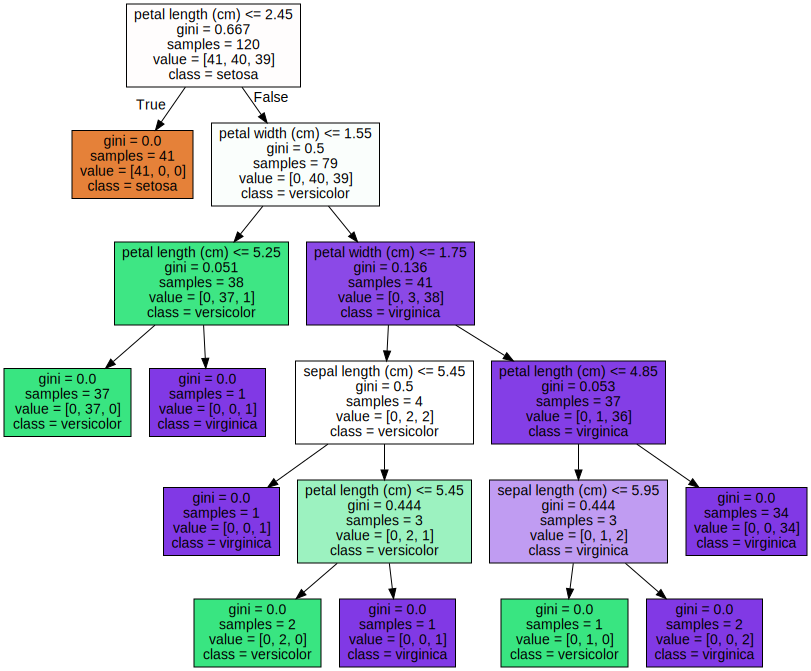

In [12]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# petal length <=2.45인 데이터의 gini계수는 0.667 -> 혼잡도가 있음
# 개수 많은 41 고름 지니계수가 0이므로 한종류만 있음 -> 더 분류할 필요 x setosa품종임
# 맨처음 어떤 기준을 사용할지 판단할 수 있는 지니계수? 

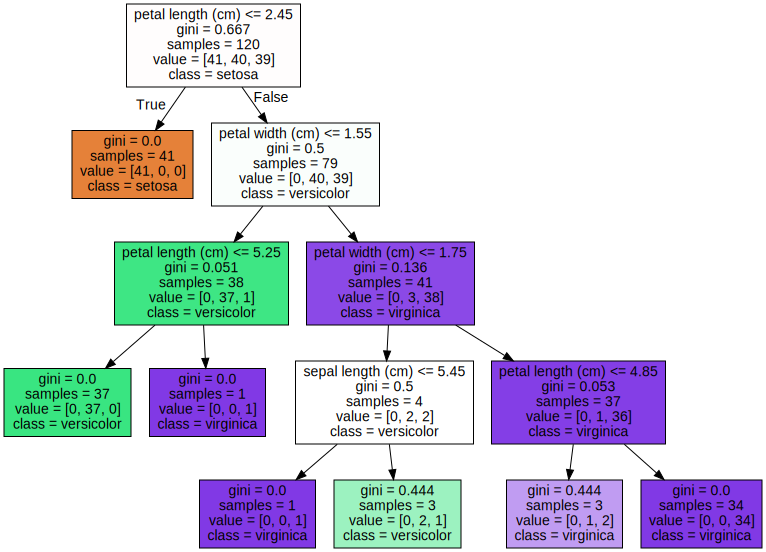

In [15]:
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_split=4)
dt_clf.fit(X_train,y_train)
## 데이터 추출
export_graphviz(dt_clf,
                'tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names, 
                filled=True) 
# class_names 결정값 이름 feature_names 컬럼 이름
## 데이터 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

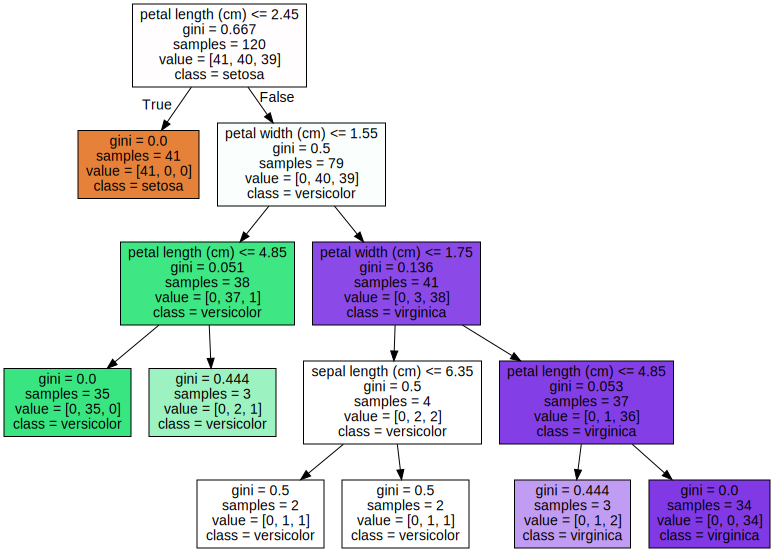

In [16]:
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=2) # 리프노드에 최소 n개 있어야
dt_clf.fit(X_train,y_train)
## 데이터 추출
export_graphviz(dt_clf,
                'tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names, 
                filled=True) 
# class_names 결정값 이름 feature_names 컬럼 이름
## 데이터 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [19]:
import numpy as np
np.round(dt_clf.feature_importances_,3)

array([0.   , 0.   , 0.554, 0.446])

In [21]:
### 결정트리 과적합 p.198
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [22]:
# x,y값 나누기
X,y = make_classification(n_features=2,
                          n_redundant=0,
                          n_classes=3,
                          n_clusters_per_class=1,
                          random_state=0) 
# n_features 컬럼의 개수 n_classes=3 3개로 분류되도록


In [23]:
X[:2]

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113]])

In [24]:
y # 0,1,2, 3가지 형태

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0])

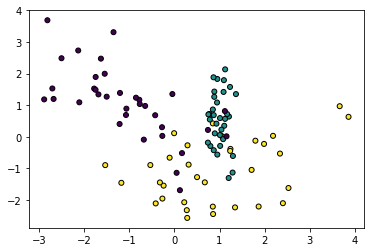

In [25]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=25,edgecolors='k') 
# X는 변수 2개 y값은 3개의 값이 나옴 # c=y 같은 y끼리 같은 색

In [26]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', 
                           # clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\user\AppData\Local\Temp\ipykernel_4520\1582449568.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


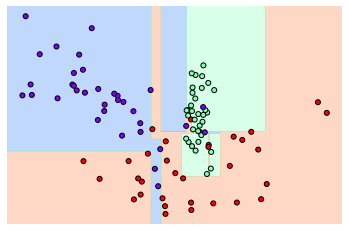

In [28]:
# 데이터 학습
# 분류하기 위해 모델 학습을 시킴
dt_clf = DecisionTreeClassifier(random_state=156).fit(X,y)
# 시각화
visualize_boundary(dt_clf,X,y)
# 조건 하나하나 넣으니 과적합됨?

C:\Users\user\AppData\Local\Temp\ipykernel_4520\1582449568.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


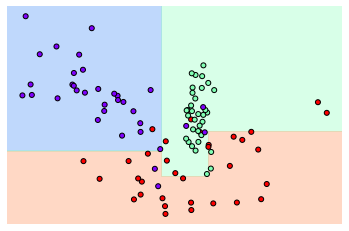

In [29]:
# 과적합 방지하기 위한 min_samples_leaf
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=6).fit(X,y)
# 시각화
visualize_boundary(dt_clf,X,y)

C:\Users\user\AppData\Local\Temp\ipykernel_4520\1582449568.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


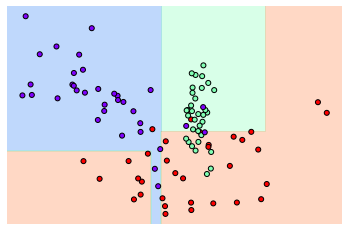

In [30]:
# 과적합 방지하기 위한 max_depth
dt_clf = DecisionTreeClassifier(random_state=156,max_depth=3).fit(X,y)
# 시각화
visualize_boundary(dt_clf,X,y)